In [1]:
from sklearn import datasets
import pandas as pd

boston = datasets.load_boston()
boston_data = pd.DataFrame(boston.data)
boston_data.columns = boston['feature_names']
boston_data['price'] = boston['target']
# boston_data.head()

In [2]:
import numpy as np

cor=pd.DataFrame(np.corrcoef(np.transpose(boston_data)))
cor.columns=np.concatenate([boston['feature_names'],['price']])
cor.index=np.concatenate([boston['feature_names'],['price']])
# cor

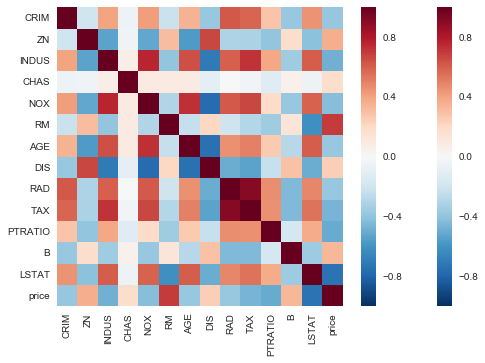

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cor)
plt.show()

In [21]:
# Stepwise regression
# forward selection method & backward selection method

import statsmodels.api as sm

boston = datasets.load_boston()
boston_data = pd.DataFrame(boston.data)
boston_data.columns=boston['feature_names']
y = boston['target']
n = y.size
#n
x = boston_data
#x
while True:
    nvars = x.shape[1] # total number of feature
    q = 1 # 1 var to remove
    p = nvars - q
    
    x2 = sm.add_constant(x)
    boston_model = sm.OLS(y,x2).fit()
    ssres0 = boston_model.ssr
    
    fvalues = []
    for i in range(1,nvars+1):
        col = x2.columns[i]
        x2_cut = x2.drop(col,1)
        boston_model_cut = sm.OLS(y,x2_cut).fit()
        ssres1 = boston_model_cut.ssr
        F = (ssres1-ssres0)/q/(ssres0/n-p-q-1)
        print("if removing column ", col," ssres_removed = ", ssres1," ssres_orig=",ssres0," F=", F)
        fvalues.append([col, F])  # stored [column name, F]
    sorted_F = sorted(fvalues, key = lambda x:x[1])
    lowest_F = sorted_F[0][1]
    if lowest_F < 1.07:
        print("removing column", sorted_F[0][0])
        x = x.drop(sorted_F[0][0], 1)
    else:
        print("STOP: no F-to-remove < 1.07 !!!")
        break
        
    
    


if removing column  CRIM  ssres_removed =  11322.0042771  ssres_orig= 11080.2762841  F= 30.6070841336
if removing column  ZN  ssres_removed =  11337.5024409  ssres_orig= 11080.2762841  F= 32.569428655
if removing column  INDUS  ssres_removed =  11082.8675978  ssres_orig= 11080.2762841  F= 0.328106626577
if removing column  CHAS  ssres_removed =  11299.5554106  ssres_orig= 11080.2762841  F= 27.7646564193
if removing column  NOX  ssres_removed =  11568.8822347  ssres_orig= 11080.2762841  F= 61.8662458229
if removing column  RM  ssres_removed =  12946.1792194  ssres_orig= 11080.2762841  F= 236.256659471
if removing column  AGE  ssres_removed =  11080.3490759  ssres_orig= 11080.2762841  F= 0.00921673651955
if removing column  DIS  ssres_removed =  12312.8207008  ssres_orig= 11080.2762841  F= 156.062151481
if removing column  RAD  ssres_removed =  11558.4487411  ssres_orig= 11080.2762841  F= 60.5451790673
if removing column  TAX  ssres_removed =  11322.3298335  ssres_orig= 11080.2762841  F=

In [22]:
y = boston['target']
n = y.size
features = boston_data
x = pd.DataFrame(np.full([n,1],1.0))

nvars = features.shape[1] #total number of features
q = 1 #1 var to remove
p = x.shape[1] - 1 # current num of features, excluding constants 
boston_model = sm.OLS(y,x).fit()
ssres0=boston_model.ssr

fvalues = []
for i in range(1, nvars):
    feature = features.columns[i]
    col = features[[feature]]
    x_plus = pd.concat([x, col], axis = 1)
    boston_model_plus = sm.OLS(y, x_plus).fit()
    ssres1=boston_model_plus.ssr
    F = (ssres0-ssres1)/q/(ssres1/(n-p-q-1))
    print("if adding feature ", feature," ssres_plus = ", ssres1," ssres_orig=",ssres0," F=", F)
    fvalues.append([feature, F])  # stored [column name, F]
sortedF = sorted(fvalues, key=lambda x: x[1], reverse = True)
highestF = sortedF[0][1]  
if highestF > 2.07:
    feature = sortedF[0][0]
    col = features[[feature]]
    print("==== adding feature ", feature," reduction in residual = ",ssres0-ssres1," F = ",sortedF[0][1],"\n")
    x = pd.concat([x, col], axis = 1)
    features = features.drop(feature, 1)
else:
    print("STOP: no F-to-remove > 2.07 !!!")

if adding feature  ZN  ssres_plus =  37166.5582239  ssres_orig= 42716.295415  F= 75.257642299
if adding feature  INDUS  ssres_plus =  32721.1081504  ssres_orig= 42716.295415  F= 153.954883136
if adding feature  CHAS  ssres_plus =  41404.2161444  ssres_orig= 42716.295415  F= 15.9715124204
if adding feature  NOX  ssres_plus =  34916.1699078  ssres_orig= 42716.295415  F= 112.59148028
if adding feature  RM  ssres_plus =  22061.8791962  ssres_orig= 42716.295415  F= 471.846739876
if adding feature  AGE  ssres_plus =  36646.5343501  ssres_orig= 42716.295415  F= 83.4774592192
if adding feature  DIS  ssres_plus =  40048.0488426  ssres_orig= 42716.295415  F= 33.5795703259
if adding feature  RAD  ssres_plus =  36495.1548117  ssres_orig= 42716.295415  F= 85.9142776698
if adding feature  TAX  ssres_plus =  33338.9613204  ssres_orig= 42716.295415  F= 141.761356577
if adding feature  PTRATIO  ssres_plus =  31702.013207  ssres_orig= 42716.295415  F= 175.105542876
if adding feature  B  ssres_plus =  37